In [9]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#load dataset

csv_file_path = "C:\\Users\\gines\\Downloads\\smartphones.csv"

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Print the DataFrame (optional)
display(df)


,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [ ]:
#Data Cleaning

In [11]:
#Convert all column names to lowercase for consistency
def lowercase_column_names(df):
    """
    Conver all column names of a DataFrame to lowercase.

    Parameters:
    df: The DataFrame whose column names need to be converted

    Returns:
    df: The DataFrame with all column names in lowercase
    """
    df = df.rename(columns=str.lower)
    return df

In [12]:
df = lowercase_column_names(df)
df.head()

,brand_name,model,price,avg_rating,5g_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [13]:
#display any missing values in the dataset
df.isnull().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5g_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [36]:
#Defining a function to clean the columns containing missing values

def missingvalues_df(df):

  # Check data types before imputation
  if pd.api.types.is_numeric_dtype(df['processor_speed']):
    df['avg_rating'].fillna(df['processor_speed'].mean(), inplace=True)
  else:
    display("Warning: processor_speed is not numerical, using mode for avg_rating")
    df['avg_rating'].fillna(df['avg_rating'].mode().iloc[0], inplace=True)

  if pd.api.types.is_numeric_dtype(df['os']):
    df['battery_capacity'].fillna(df['os'].mean(), inplace=True)
  else:
    display("Warning: os is not numerical, using mode for battery_capacity")
    df['battery_capacity'].fillna(df['battery_capacity'].mode().iloc[0], inplace=True)

  # Consider alternative to dropping rows (commented out)
  # df.dropna(subset=['fast_charging', 'avg_rating'], inplace=True)

  return df  # Return statement inside the function

clean_df = missingvalues_df(df.copy())


display(clean_df)

'Warning: os is not numerical, using mode for battery_capacity'

,brand_name,model,price,avg_rating,5g_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,5000.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,5000.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [39]:
#Defining a function to clean the columns containing missing values

def missingvalues_df(df):

  if pd.api.types.is_numeric_dtype(df['processor_speed']):
    df['avg_rating'].fillna(df['processor_speed'].mean(), inplace=True)
  else:
    display("Warning: processor_speed is not numerical, using mode for avg_rating")
    df['avg_rating'].fillna(df['avg_rating'].mode().iloc[0], inplace=True)

  if pd.api.types.is_numeric_dtype(df['os']):
    df['battery_capacity'].fillna(df['os'].mean(), inplace=True)
  else:
    display("Warning: os is not numerical, using mode for battery_capacity")
    df['battery_capacity'].fillna(df['battery_capacity'].mode().iloc[0], inplace=True)

  df['primary_camera_front'].fillna(df['primary_camera_front'].mode().iloc[0], inplace=True)

  return df

clean_df = missingvalues_df(df.copy())  

display(clean_df)


'Warning: os is not numerical, using mode for battery_capacity'

,brand_name,model,price,avg_rating,5g_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,5000.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,5000.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [35]:
df_smartphones = missingvalues_df(df)

In [40]:
#checking again whether there are any remaining missing values
df_smartphones.isnull().sum()

brand_name                     0
model                          0
price                          0
avg_rating                     0
5g_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity               0
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [41]:
df_smartphones.head()

,brand_name,model,price,avg_rating,5g_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,5000.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,5000.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [ ]:
## Exploratory Data Analysis

C:\Users\gines\AppData\Local\Temp\ipykernel_46888\3905002097.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_smartphones['brand_name'], order = order, palette = palette)


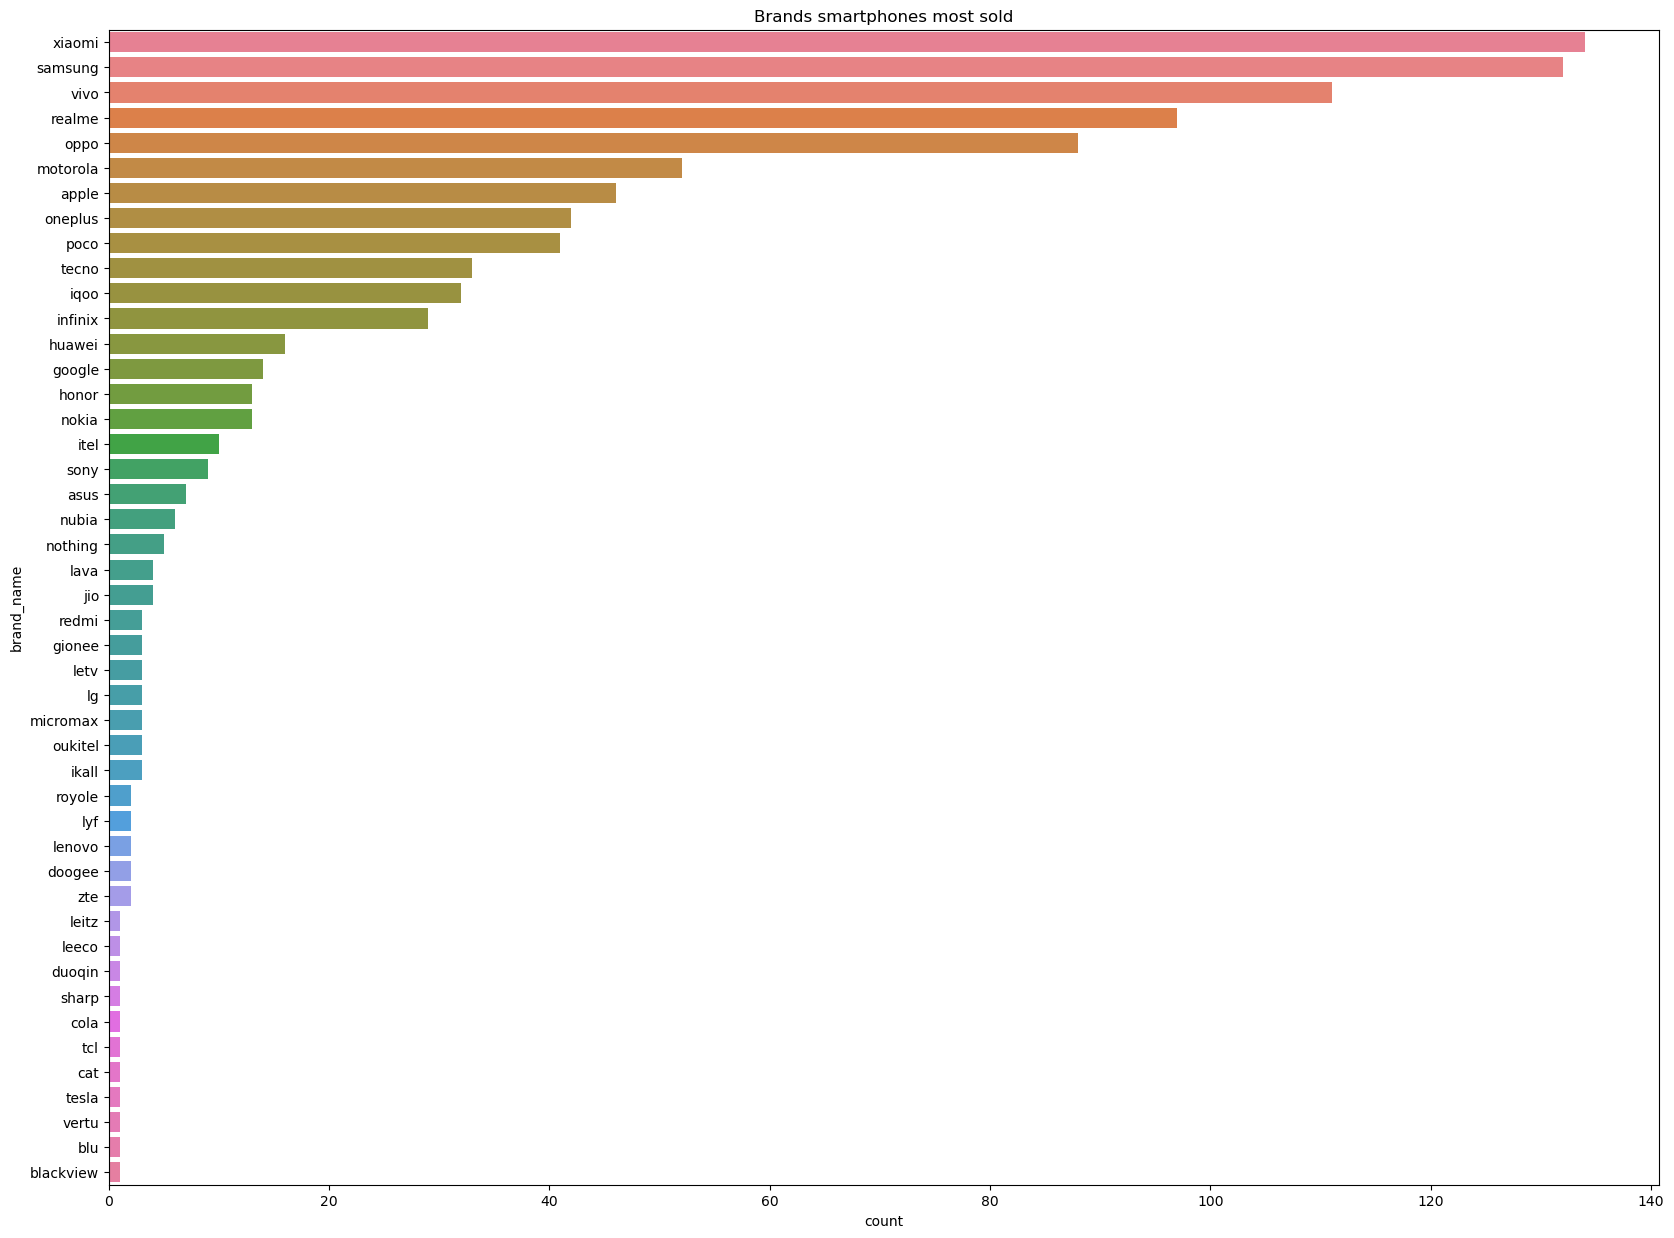

In [44]:
#Generate a color palette with the same number of uniques values for 'make'
num_colors = df_smartphones['brand_name'].nunique()
palette = sns.color_palette("husl", num_colors)

#get the value counts of the 'brand name' columns and sort by count
order = df_smartphones['brand_name'].value_counts().index

#Create a countplot for each car brand in the dataset
plt.figure(figsize = (20,15))
sns.countplot(y=df_smartphones['brand_name'], order = order, palette = palette)
plt.title("Brands smartphones most sold")
plt.show()

C:\Users\gines\AppData\Local\Temp\ipykernel_46888\3843175272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_smartphones['avg_rating'], palette = palette_year)


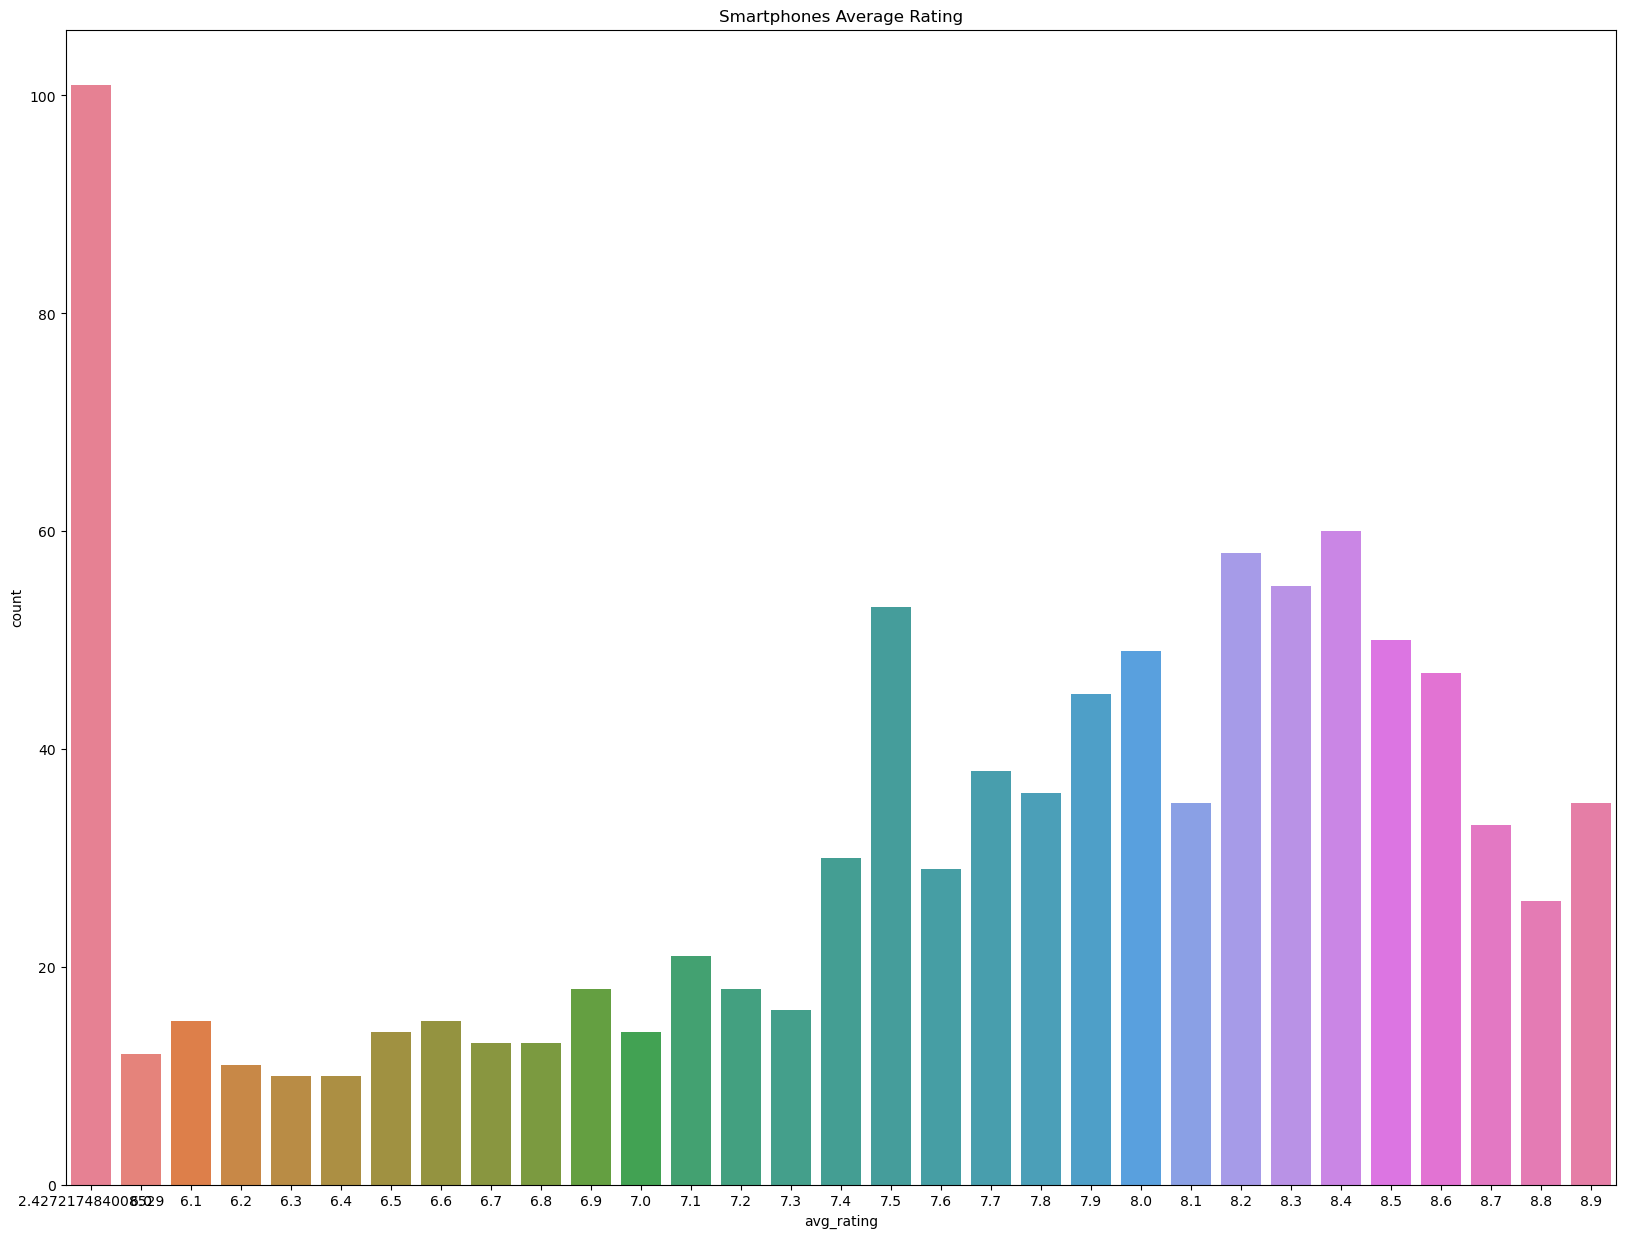

In [46]:
#Generate a color palette with the same number of uniques values for 'year'
num_colors_year = df_smartphones['avg_rating'].nunique()
palette_year = sns.color_palette("husl", num_colors_year)

#Create a countplot for each year in the dataset
plt.figure(figsize = (20,15))
sns.countplot(x=df_smartphones['avg_rating'], palette = palette_year)
plt.title("Smartphones Average Rating")
plt.show()

In [2]:
df_smartphones = pd.DataFrame(data)

In [4]:
import pandas as pd

# Define the file path (replace with your actual file path)
data_file = "C:\\Users\\gines\\Downloads\\smartphones.csv"

# Read data from CSV file (assuming the file has headers)
df_smartphones = pd.read_csv(data_file)


C:\Users\gines\AppData\Local\Temp\ipykernel_61828\1219544432.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_smartphones['truncated_rating'], palette=palette_year)
C:\Users\gines\AppData\Local\Temp\ipykernel_61828\1219544432.py:18: UserWarning: 
The palette list has fewer values (15) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df_smartphones['truncated_rating'], palette=palette_year)


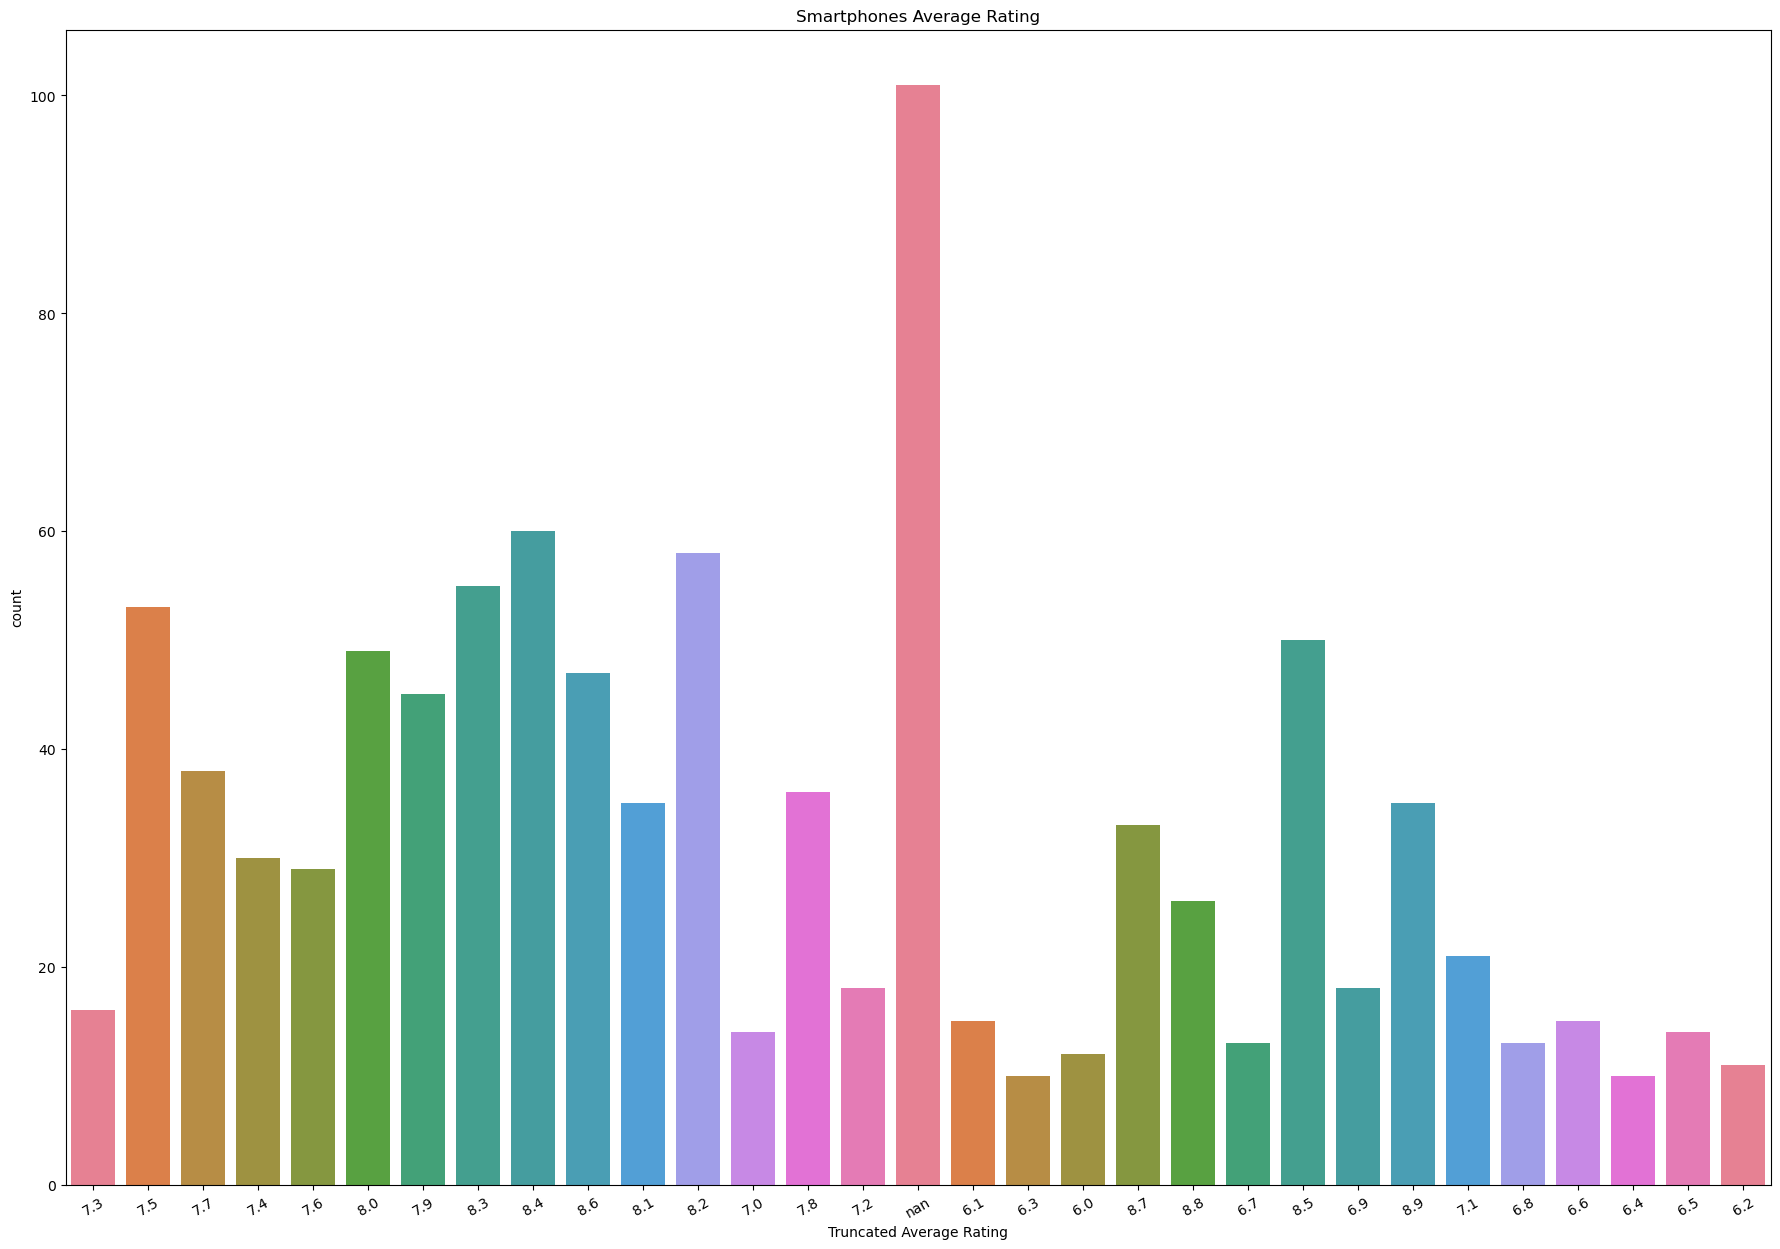

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your smartphone data in a DataFrame called 'df_smartphones'

# Truncate long rating labels (modify truncation length as needed)
df_smartphones['truncated_rating'] = df_smartphones['avg_rating'].apply(
    lambda x: str(x)[:5] if len(str(x)) > 5 else str(x)
)

# Generate a color palette with a reasonable number of colors (adjust as needed)
num_colors_year = df_smartphones['avg_rating'].nunique() // 2
palette_year = sns.color_palette("husl", num_colors_year)

# Create a countplot with truncated labels and moderate rotation
plt.figure(figsize=(22, 15))  # Adjust width as needed
sns.countplot(x=df_smartphones['truncated_rating'], palette=palette_year)
plt.xticks(rotation=30)  # Moderate rotation

# Add a title and display the plot
plt.title("Smartphones Average Rating")
plt.xlabel("Truncated Average Rating")  # Adjust label text if needed
plt.show()


C:\Users\gines\AppData\Local\Temp\ipykernel_61828\3586730027.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts, y=brand_counts.index, palette="husl")


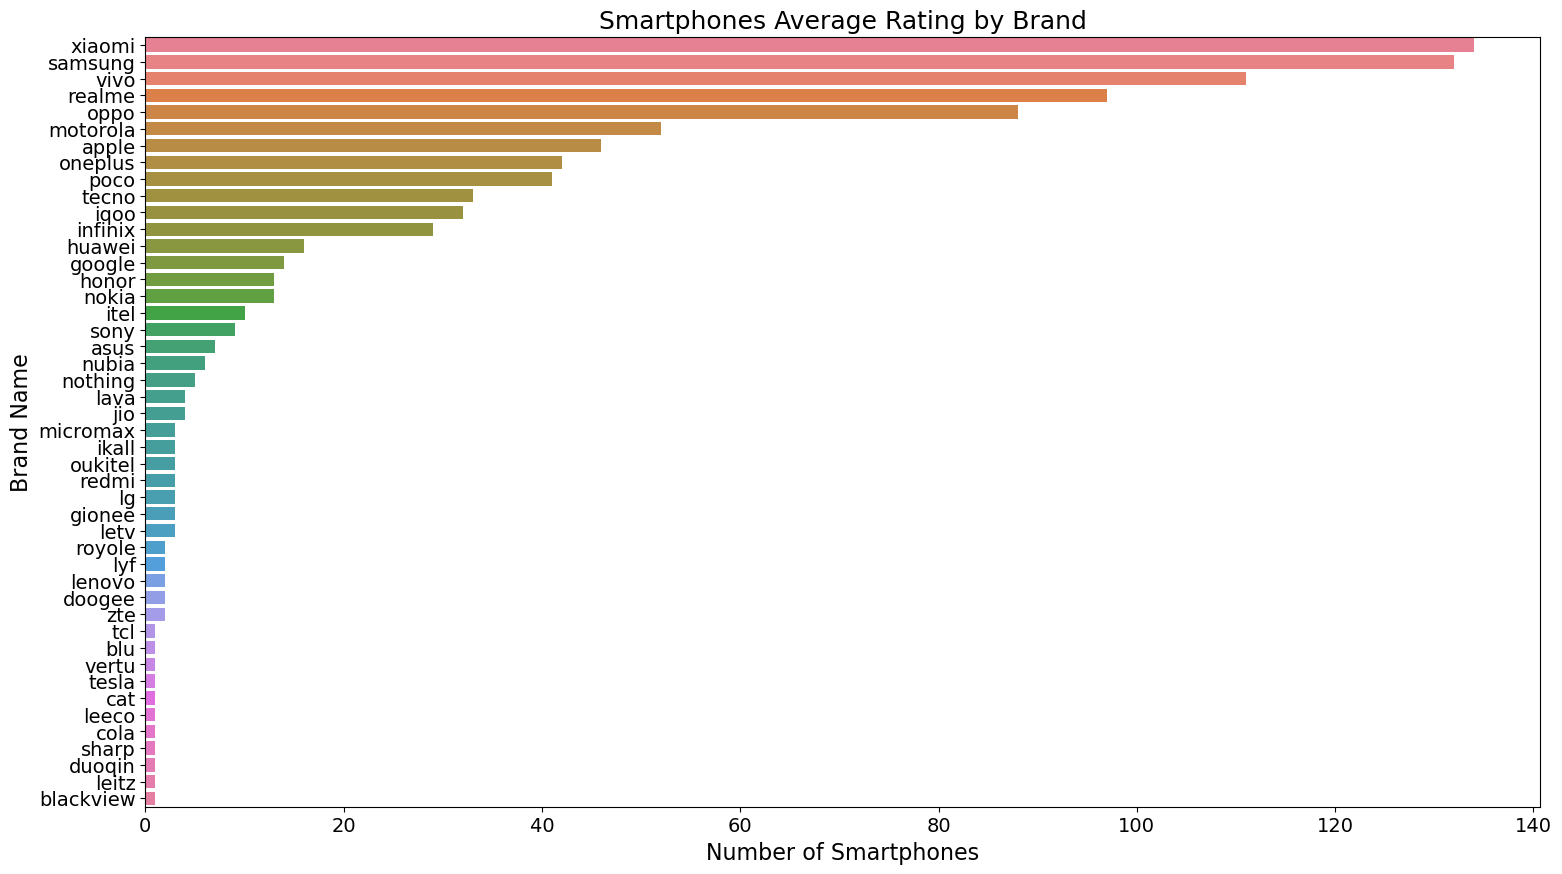

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your smartphone data in a DataFrame called 'df_smartphones'

# Ensure 'brand_name' has string values (avoid mixed data types)
df_smartphones['brand_name'] = df_smartphones['brand_name'].astype(str)

# Count smartphone occurrences by brand
brand_counts = df_smartphones['brand_name'].value_counts()

# Sort brands by count in descending order (optional)
brand_counts = brand_counts.sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(18, 10))  # Adjust size as needed
sns.barplot(x=brand_counts, y=brand_counts.index, palette="husl")

# Increase font sizes for readability
plt.xlabel("Number of Smartphones", fontsize=16)
plt.ylabel("Brand Name", fontsize=16)
plt.title("Smartphones Average Rating by Brand", fontsize=18)
plt.tick_params(labelsize=14)  # Set font size for labels

# Optional: Rotate x-axis labels if needed (experiment with angles)
# plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\gines\AppData\Local\Temp\ipykernel_61828\1846696855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_smartphones['processor_brand'], order = order_type, palette = palette_type)


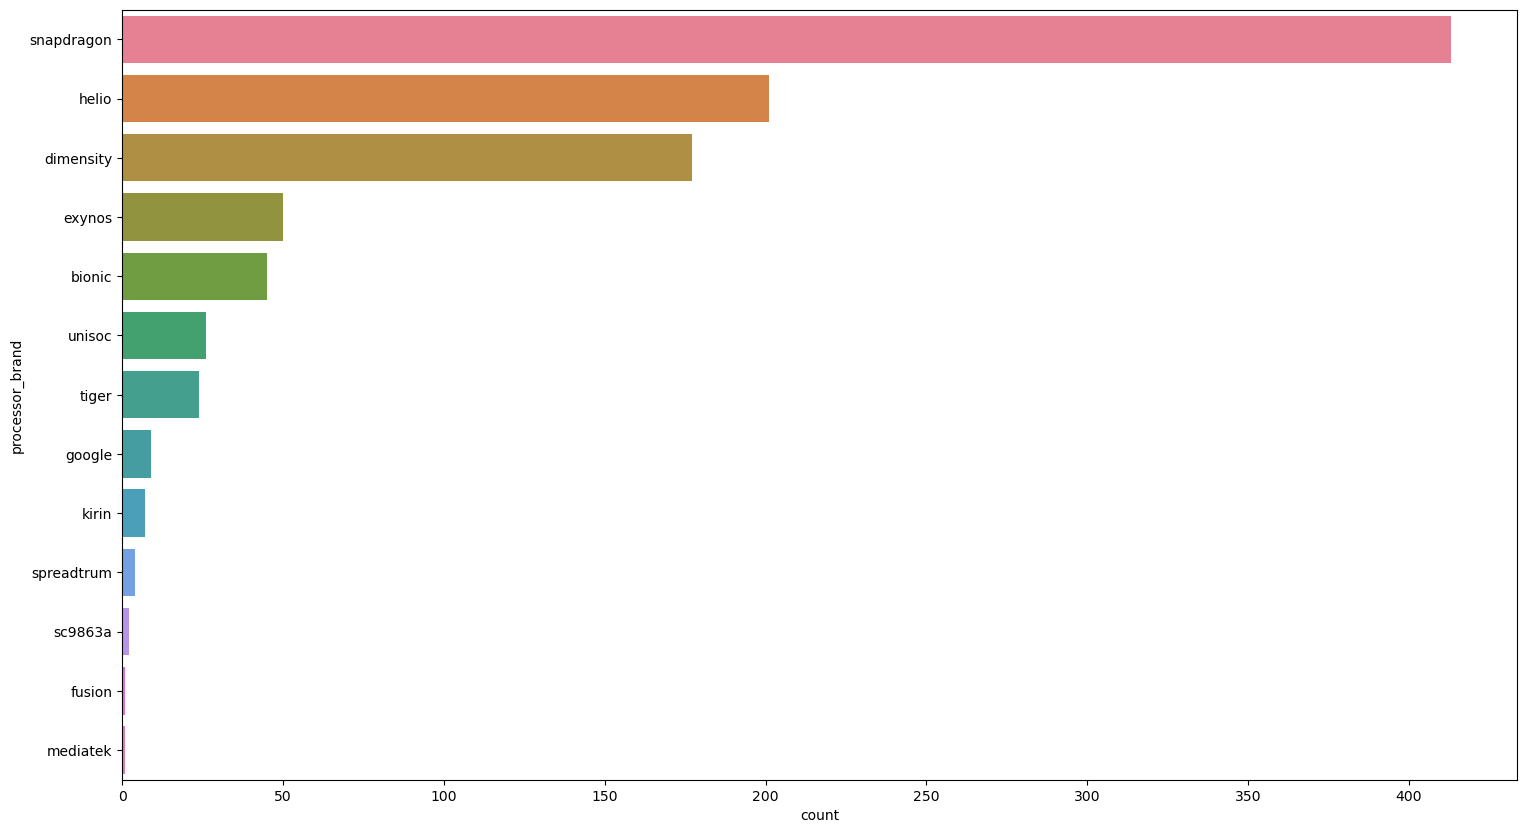

In [13]:
#Generate a color palette with the same number of uniques values for 'engine fuel type'
num_colors_type = df_smartphones['processor_brand'].nunique()
palette_type = sns.color_palette("husl", num_colors_type)

#get the value counts of the 'engine fuel type' columns and sort by count
order_type = df_smartphones['processor_brand'].value_counts().index

#Create a countplot for each fuel type in the dataset
plt.figure(figsize = (18,10))
sns.countplot(y=df_smartphones['processor_brand'], order = order_type, palette = palette_type)
plt.show()

In [17]:
# Assuming your data is stored in a pandas DataFrame named 'df'

# Select the "processor_speed" column and display all rows
processor_speeds = df_smartphones["processor_speed"]
print(processor_speeds)


0      2.65
1      2.65
2      2.65
3      3.10
4      3.10
       ... 
975    2.30
976    2.30
977    2.30
978    3.20
979    3.00
Name: processor_speed, Length: 980, dtype: float64


C:\Users\gines\AppData\Local\Temp\ipykernel_61828\2995902134.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


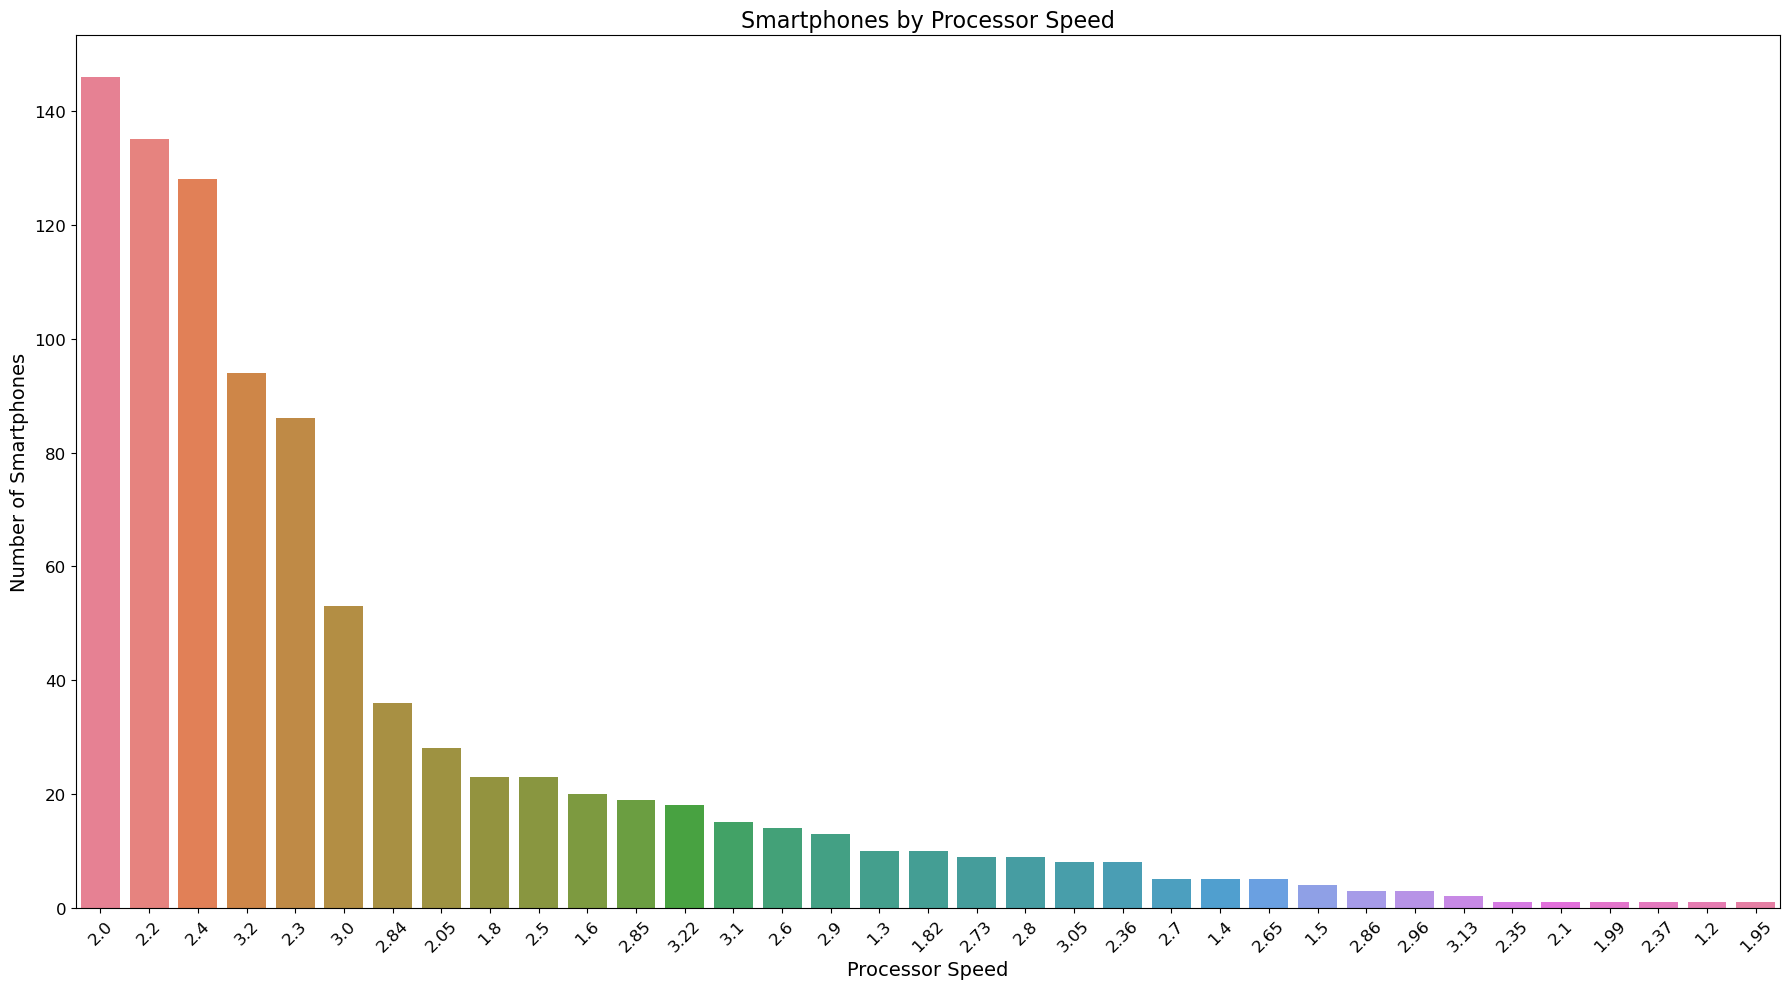

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your smartphone data in a DataFrame called 'df_smartphones'

# Ensure 'processor_speed' has numeric values (avoid mixed data types)
df_smartphones['processor_speed'] = pd.to_numeric(df_smartphones['processor_speed'], errors='coerce')

# Generate a color palette with a reasonable number of colors (adjust as needed)
num_colors_processor_speed = df_smartphones['processor_speed'].nunique()
palette_processor_speed = sns.color_palette("husl", num_colors_processor_speed)

# Get value counts of the 'processor_speed' column and sort by count
order_processor_speed = df_smartphones['processor_speed'].value_counts().index

# Create a countplot with sorted processor speeds on x-axis
plt.figure(figsize=(18, 10))
ax = sns.countplot(
    x=df_smartphones['processor_speed'], order=order_processor_speed, palette=palette_processor_speed
)

# Rotate x-axis labels for better readability (adjust rotation angle if needed)
plt.xticks(rotation=45)

# Increase font sizes for readability (optional)
plt.xlabel("Processor Speed", fontsize=14)
plt.ylabel("Number of Smartphones", fontsize=14)
plt.title("Smartphones by Processor Speed", fontsize=16)
plt.tick_params(labelsize=12)  # Set font size for x-axis tick labels

# Adjust space for x-axis labels (experiment with 'tight_layout' or 'subplots_adjust')
plt.tight_layout()  # One approach to adjust spacing

# Display the plot
plt.show()


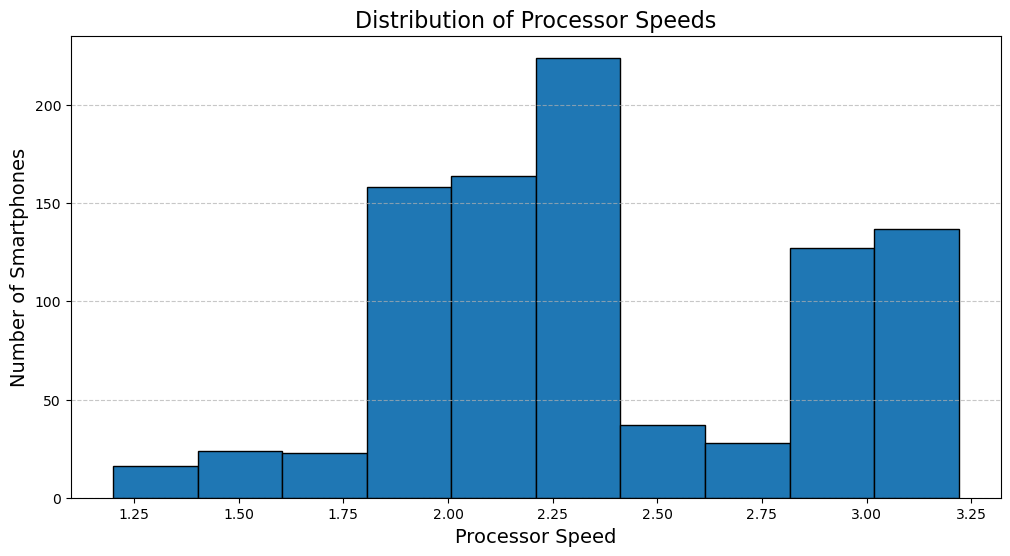

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Assuming processor speed is numerical

# Assuming you have your smartphone data in a DataFrame called 'df_smartphones'

# Ensure 'processor_speed' has numeric values
df_smartphones['processor_speed'] = pd.to_numeric(df_smartphones['processor_speed'], errors='coerce')

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(df_smartphones['processor_speed'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel("Processor Speed", fontsize=14)
plt.ylabel("Number of Smartphones", fontsize=14)
plt.title("Distribution of Processor Speeds", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


C:\Users\gines\AppData\Local\Temp\ipykernel_61828\2441472260.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_smartphones['screen_size'], shade=True)  # Or use plt.hist for histogram


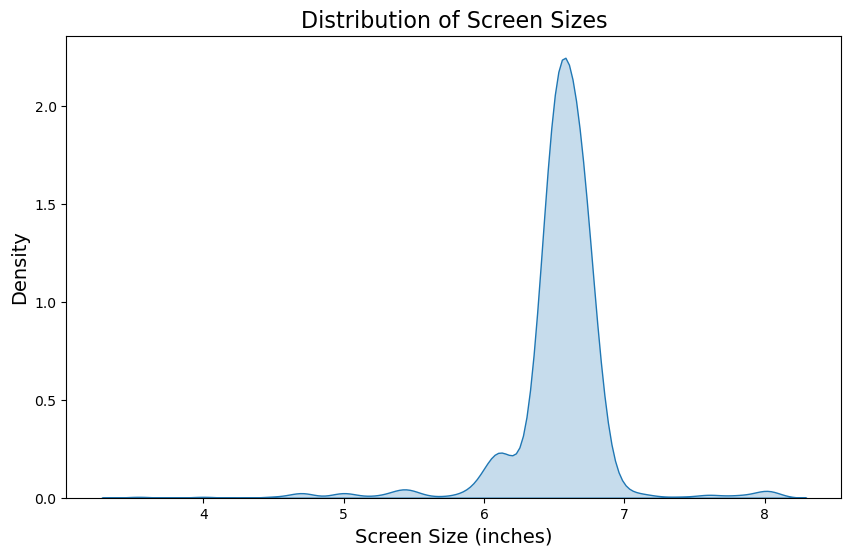

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your smartphone data in a DataFrame called 'df_smartphones'

# Assuming 'screen_size' is numerical
plt.figure(figsize=(10, 6))
sns.kdeplot(df_smartphones['screen_size'], shade=True)  # Or use plt.hist for histogram

# Add labels and title
plt.xlabel("Screen Size (inches)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Screen Sizes", fontsize=16)

# Display the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

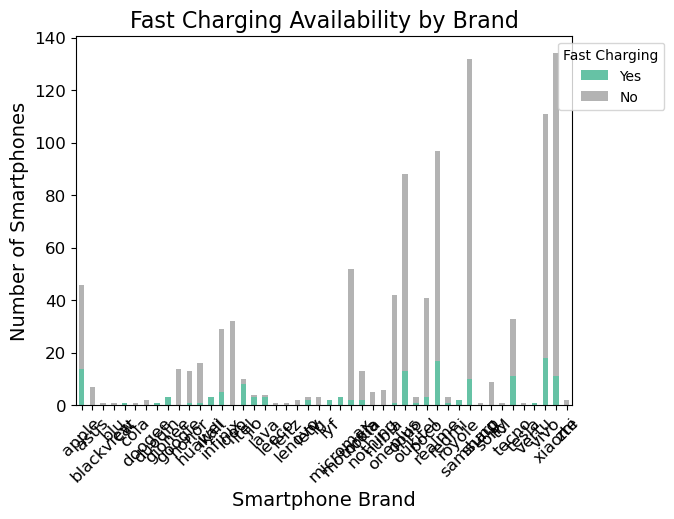

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_smartphones'

# Ensure 'fast_charging_available' is a boolean or categorical data type
df_smartphones['fast_charging_available'] = df_smartphones['fast_charging_available'].astype(bool)  # Assuming boolean type

# Group data by brand and calculate counts for fast charging availability
fast_charging_counts = df_smartphones.groupby('brand_name')['fast_charging_available'].value_counts().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
fast_charging_counts.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and title
plt.xlabel("Smartphone Brand", fontsize=14)
plt.ylabel("Number of Smartphones", fontsize=14)
plt.title("Fast Charging Availability by Brand", fontsize=16)
plt.legend(title="Fast Charging", labels=['Yes', 'No'], loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position if needed

# Rotate x-axis labels for better readability (adjust rotation angle if needed)
plt.xticks(rotation=45)

# Increase font sizes for readability (optional)
plt.tick_params(labelsize=12)

# Display the plot
plt.show()


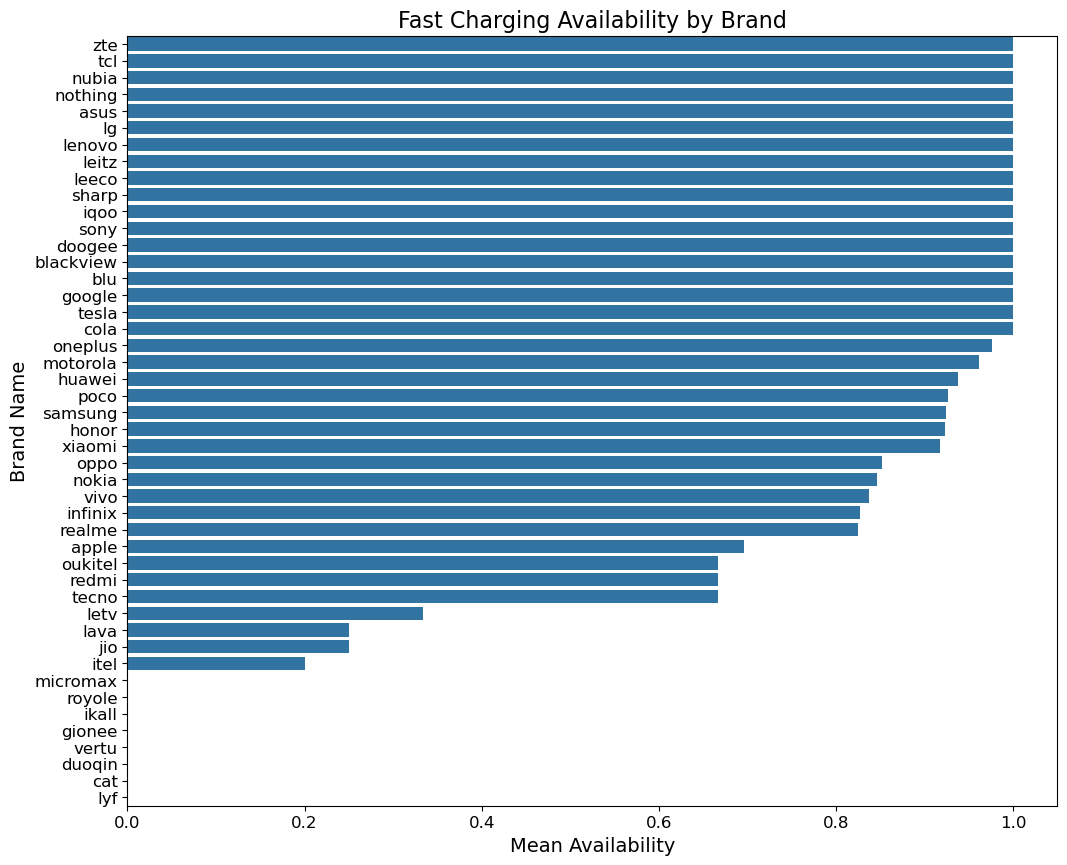

In [47]:
# Assuming your data is stored in a DataFrame named 'df_smartphones'

# Calculate mean availability (Yes/No) per brand
availability_mean = df_smartphones.groupby('brand_name')['fast_charging_available'].mean().reset_index()

# Sort by mean availability (descending)
availability_mean_sorted = availability_mean.sort_values(by='fast_charging_available', ascending=False)

# Plot the mean availability per brand (horizontal)
plt.figure(figsize=(12, 10))  # Adjusted figure size for horizontal chart
sns.barplot(data=availability_mean_sorted, x='fast_charging_available', y='brand_name', orient='h')
plt.title("Fast Charging Availability by Brand", fontsize=16)  # Adjusted title

# Adjust labels (optional)
plt.xlabel("Mean Availability", fontsize=14)  # Adjusted label
plt.ylabel("Brand Name", fontsize=14)  # Adjusted label

# Increase font sizes for readability (optional)
plt.tick_params(labelsize=12)

plt.show()


<Figure size 1200x1000 with 0 Axes>

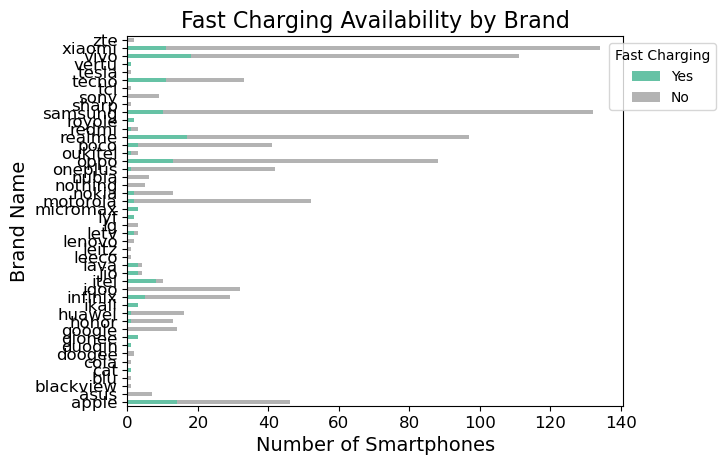

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df_smartphones'

# Ensure 'fast_charging_available' is a boolean or categorical data type
df_smartphones['fast_charging_available'] = df_smartphones['fast_charging_available'].astype(bool)  # Assuming boolean type

# Group data by brand and calculate counts for fast charging availability
fast_charging_counts = df_smartphones.groupby('brand_name')['fast_charging_available'].value_counts().unstack(fill_value=0)

# Create a horizontal stacked bar chart
plt.figure(figsize=(12, 10))  # Adjust size as needed
fast_charging_counts.plot(kind='barh', stacked=True, colormap='Set2')

# Add labels and title
plt.xlabel("Number of Smartphones", fontsize=14)
plt.ylabel("Brand Name", fontsize=14)  # Y-axis now shows brands
plt.title("Fast Charging Availability by Brand", fontsize=16)
plt.legend(title="Fast Charging", labels=['Yes', 'No'], loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position if needed

# Increase font sizes for readability (optional)
plt.tick_params(labelsize=12)

# Rotate x-axis labels for better readability (optional)


In [13]:
import pandas as pd

# Define the CSV file path with double backslashes for Windows
csv_file_path2 = "C:\\Users\\gines\\Desktop\\Projectfolder\\Finalproject\\smartphones.csv"
try:
  # Attempt to read the CSV file using pandas.read_csv
  df2 = pd.read_csv(csv_file_path2)
  display(df2)  # Print the DataFrame
except FileNotFoundError:
  display("Error: CSV file not found. Please check the file path.")

# Optional error handling for other potential issues like incorrect data format


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


In [12]:
import pandas as pd

# Define the CSV file path with double backslashes for Windows
csv_file_path = "C:\\Users\\gines\\Desktop\\Projectfolder\\Finalproject\\Sales.csv"


# Assuming your CSV file exists and is in the correct format
try:
  # Attempt to read the CSV file using pandas.read_csv
  df = pd.read_csv(csv_file_path)
  display(df)  # Print the DataFrame
except FileNotFoundError:
  display("Error: CSV file not found. Please check the file path.")

# Optional error handling for other potential issues like incorrect data format


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [14]:
#Convert all column names to lowercase for consistency
def lowercase_column_names(df):
    """
    Conver all column names of a DataFrame to lowercase.

    Parameters:
    df: The DataFrame whose column names need to be converted

    Returns:
    df: The DataFrame with all column names in lowercase
    """
    df = df.rename(columns=str.lower)
    return df

In [15]:
df = lowercase_column_names(df)
df.head()

,brands,models,colors,memory,storage,camera,rating,selling price,original price,mobile,discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [16]:
#display any missing values in the dataset
df.isnull().sum()

brands                   0
models                   0
colors                   0
memory                  43
storage                 39
camera                   0
rating                 144
selling price            0
original price           0
mobile                   0
discount                 0
discount percentage      0
dtype: int64

In [23]:
df_cleaned = df.dropna(subset=['memory'])
df['memory'].fillna(0, inplace=True)
df_cleaned = df.dropna(subset=['rating'])
df['rating'].fillna(0, inplace=True)
df_cleaned = df.dropna(subset=['storage'])
df['storage'].fillna(0, inplace=True)
df.isnull().sum()

brands                 0
models                 0
colors                 0
memory                 0
storage                0
camera                 0
rating                 0
selling price          0
original price         0
mobile                 0
discount               0
discount percentage    0
dtype: int64

In [27]:
import pandas as pd

# Define the CSV file path with double backslashes for Windows
csv_file_path = "C:\\Users\\gines\\Desktop\\Projectfolder\\Finalproject\\Sales.csv"

df_Sales = pd.DataFrame(data)

NameError: name 'data' is not defined

In [28]:
group = df_Sales.groupby(colors)
mean = grouped['rating'].mean().round(2)

NameError: name 'df_Sales' is not defined